<a href="https://colab.research.google.com/github/drpetros11111/ModernCompVision/blob/01_OpenCV/3_Color_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)


# **Color Spaces**

In this lesson we'll learn to:
1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2024-10-31 16:40:46--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.38, 3.5.245.234, 52.95.191.42, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.38|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-31 16:40:47 ERROR 404: Not Found.

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


# Display an image using Matplotlib, while ensuring the image is shown with the correct aspect ratio

and providing options for customization (title and size).

-----------------------------------
Step-by-step explanation:

    def imshow(title="Image", image=None, size=10):

This line defines the function named imshow and its parameters:

###title:

The title to be displayed above the image (defaults to "Image").

###image:

The image data (NumPy array).

Although the default is None, the function expects this to be provided and would throw an error otherwise.

###size:

A scaling factor for the image size (defaults to 10).

w, h = image.shape[0], image.shape[1]:

This line extracts the width (w) and height (h) of the image from its shape attribute.

image.shape[0] represents the height.

image.shape[1] represents the width.

aspect_ratio = w/h:

This line calculates the aspect ratio of the image by dividing the width by the height.

-----------------------------------
###plt.figure(figsize=(size * aspect_ratio, size)):

This line creates a new Matplotlib figure (window) to display the image.
figsize is set using the calculated aspect ratio and the size parameter to ensure the image is displayed with the correct proportions.

------------------------
###plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)):

This line displays the image using Matplotlib's imshow function.

Important: OpenCV loads images in BGR (Blue, Green, Red) color format by default.

Matplotlib expects images in RGB format.

Therefore, cv2.cvtColor(image, cv2.COLOR_BGR2RGB) is used to convert the image from BGR to RGB before displaying it.

------------------------------
###plt.title(title):

This line sets the title of the plot to the value provided in the title parameter.

###plt.show():

This line displays the Matplotlib figure (the image with the title) on the screen.

In essence, the imshow function simplifies the process of displaying images in a Jupyter Notebook or Google Colab environment using Matplotlib, ensuring the images are shown with correct aspect ratios and appropriate titles

------------------------------
----------------------------------
# Display the height, width, and number of color channels of an image

-------------------------------
Here's a more detailed explanation:

#1. image.shape

In OpenCV, when you load an image using

##cv2.imread()
 it is stored as a NumPy array.

The shape attribute of this NumPy array gives you the dimensions of the image.

It returns a tuple: (height, width, channels).

height: The number of rows of pixels in the image.

width: The number of columns of pixels in the image.

channels: The number of color channels (e.g., 3 for RGB images, 1 for grayscale).

---------------------------------
#2. Accessing Individual Dimensions

###image.shape[0]:

Accesses the first element of the shape tuple, which is the height.

###image.shape[1]:

Accesses the second element, which is the width.

###image.shape[2]:

Accesses the third element, which is the number of channels.

------------------------------
#3. int(...)

Although the values returned by image.shape are usually integers, it's a good practice to explicitly convert them using int() to ensure they are treated as integers.

------------------------
#4. print('Height of Image: {} pixels'.format(int(image.shape[0])))

- This line is responsible for printing the height to the console.

-  `format(...)`:

This is a method used for string formatting.

It inserts the given value into the string and replaces the placeholder.

- In this case `{}`  in the string `'Height of Image: {} pixels'` is replaced with the height of the image calculated as `int(image.shape[0])`

------------------------
#In essence
the code extracts the height, width, and channel information from the image's shape attribute and then uses string formatting to display these values in a user-friendly way.






In [ ]:
# Load our input image
image = cv2.imread('/content/castara-beach.jpg')

# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(413, 550)
(413, 550)
(413, 550)


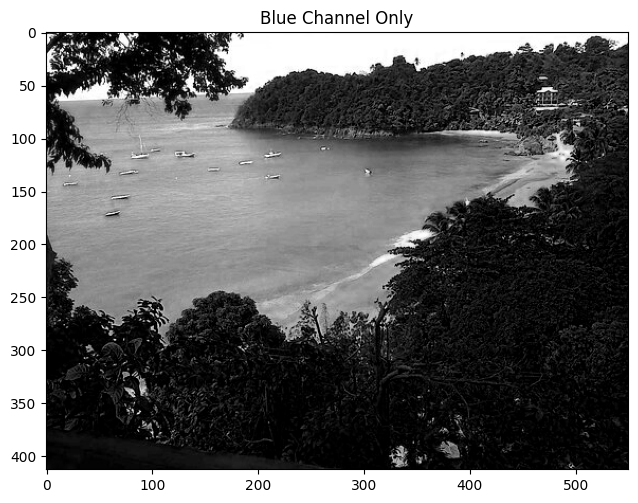

In [ ]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

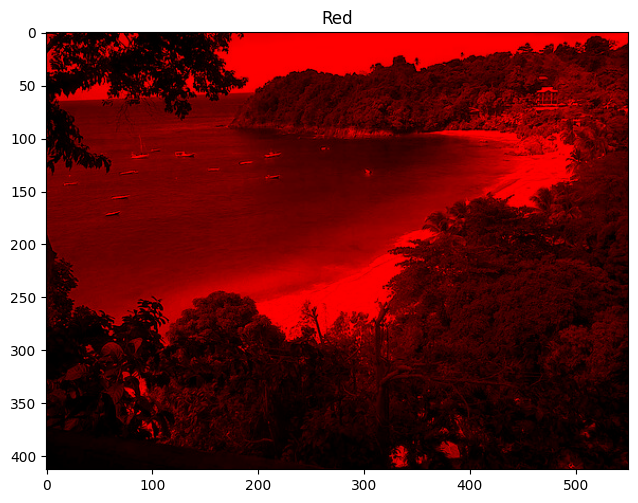

In [ ]:
import numpy as np

# Let's create a matrix of zeros
# with dimensions of the image h x w
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))



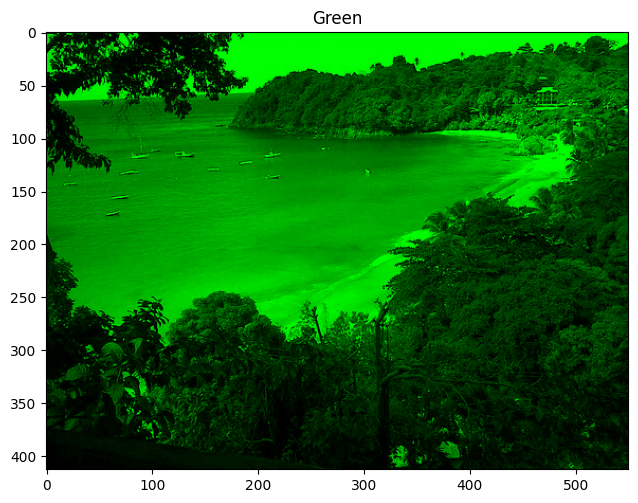

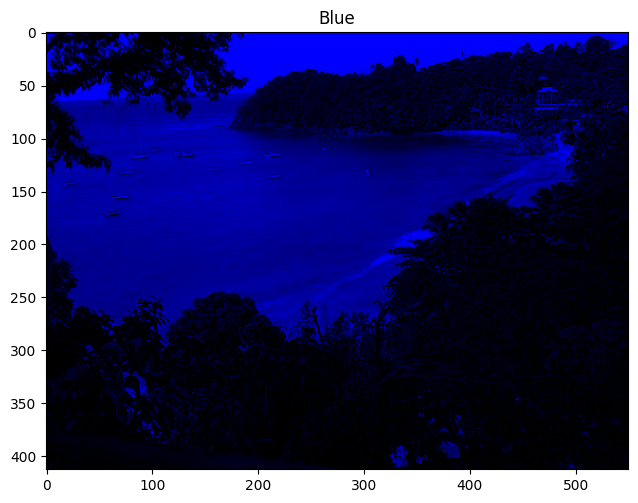

In [ ]:

imshow("Green", cv2.merge([zeros, G, zeros]))

imshow("Blue", cv2.merge([B, zeros, zeros]))

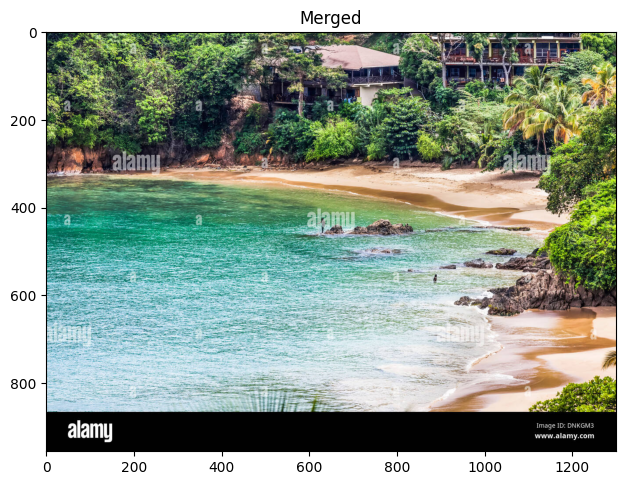

In [ ]:
image = cv2.imread('/content/castara2.jpg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image,
merged = cv2.merge([B, G, R])
imshow("Merged", merged)

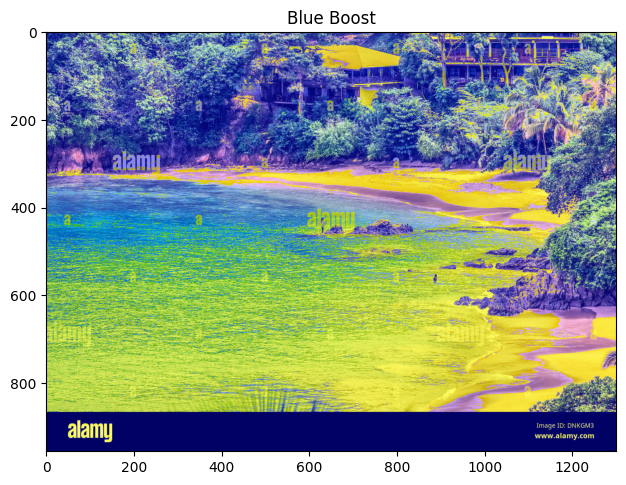

In [ ]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

# 1. Hue

##What it represents:

Hue is the pure color or shade of a color.

It's what we typically think of when we say "red," "blue," "green," etc.

##Range:

In most representations, Hue is measured in degrees, ranging from 0 to 360.

    0°: Red
    60°: Yellow
    120°: Green
    180°: Cyan
    240°: Blue
    300°: Magenta

Analogy: Think of a color wheel – Hue is the position of a color on that wheel.

-----------------------------
#2. Saturation

#What it represents:

Saturation is the intensity or purity of a color.

It describes how much of the pure color is present compared to gray.

##Range:

Usually represented as a percentage (0% to 100%) or a value from 0 to 255.

0%: Completely desaturated (grayscale)

100%: Fully saturated (pure, vivid color)

##Analogy:
Imagine adding white to a color – as you add more white, the saturation decreases, and the color becomes more pastel-like.

------------------------
#3. Value (or Brightness)

##What it represents:
Value, also called Brightness, is the lightness or darkness of a color.

It indicates how much light is reflected or emitted by the color.

Range: Similar to saturation, it's represented as a percentage (0% to 100%) or a value from 0 to 255.

0%: Completely dark (black)

100%: Completely bright (white)

##Analogy:
Think of a light dimmer switch – as you turn the switch down, the value decreases, and the color becomes darker.
Why HSV is useful:

------------------------------
#Intuitive:

HSV is often considered more intuitive than RGB (Red, Green, Blue) for tasks like color selection and manipulation, as it aligns more closely with how humans perceive color.

##Separating color from luminance:

HSV separates the color information (Hue and Saturation) from the brightness information (Value).

This can be helpful for applications like object detection, where you might want to identify objects based on their color regardless of lighting conditions.

---------------------
#In summary:

Hue: The pure color.

Saturation: The intensity or purity of the color.

Value: The lightness or darkness of the color.

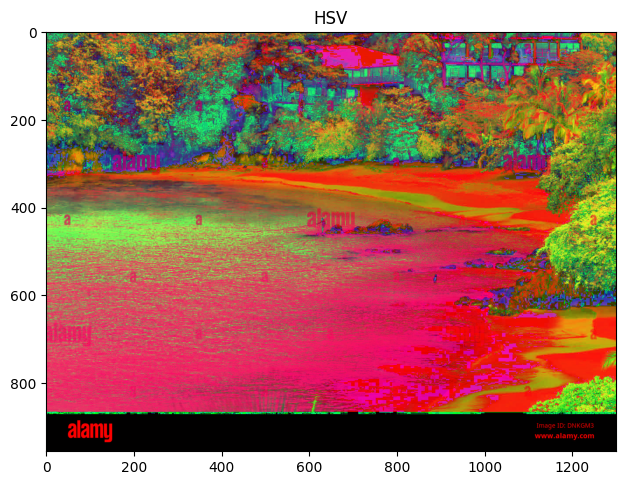

In [ ]:
# Reload our image
image = cv2.imread('/content/castara2.jpg')

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### This looks odd....why?

Because our plotting function was designed for RGB only images, not HSV

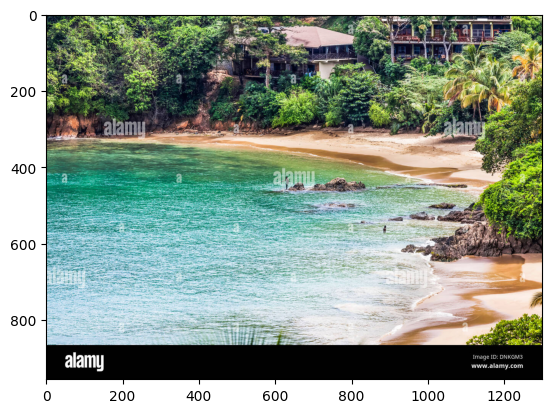

In [ ]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

### **Let's view each channel type in the HSV Color Space representation**

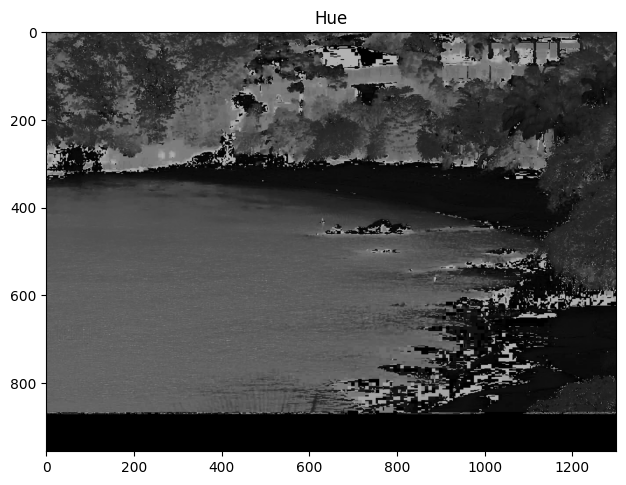

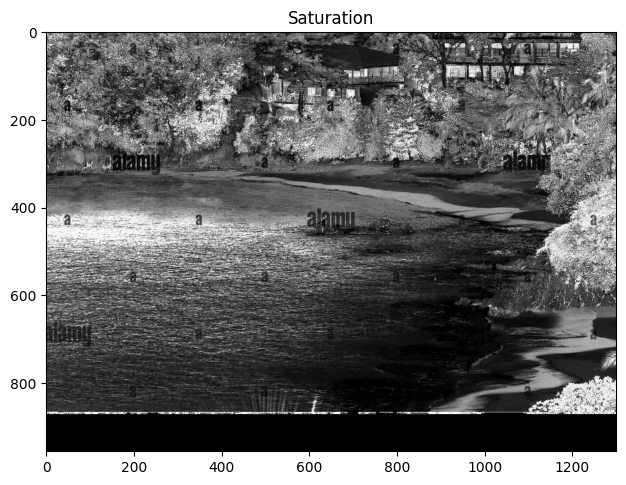

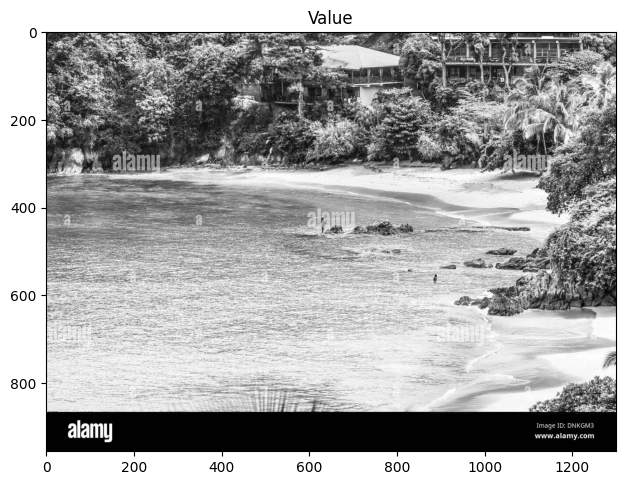

In [ ]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])

# Display the individual channels (Hue, Saturation, and Value) of an image that is represented in the HSV color space.

It uses the custom imshow function you defined earlier to achieve this.

-------------------------------
Breakdown:

    hsv_image[:, :, 0]:

This part extracts the Hue channel from the hsv_image.

[:, :, 0] is used to slice the NumPy array representing the image.

: selects all rows.

: selects all columns.

0 selects the first channel, which corresponds to Hue in the HSV color space.

----------------------
    imshow("Hue", hsv_image[:, :, 0])

This line calls your custom imshow function to display the Hue channel.

It passes "Hue" as the title and the extracted Hue channel data (hsv_image[:, :, 0]) as the image to be displayed.

------------------
    imshow("Saturation", hsv_image[:, :, 1])

Similar to the previous line, this displays the Saturation channel.

It extracts the Saturation channel using hsv_image[:, :, 1] (selecting the second channel).

-------------------------------
    imshow("Value", hsv_image[:, :, 2])

This line displays the Value channel.
It extracts the Value channel using hsv_image[:, :, 2] (selecting the third channel).

-------------------------
##Switching back to viewing the RGB representation:

The comment implies that earlier in your code, the image was plotted using plt.

imshow() without converting it to RGB, thus displaying in a distorted manner.

Now, the code is using the custom imshow() function which does the conversion implicitly.

Hence, this snippet utilizes the imshow function which internally converts the HSV components (Hue, Saturation, Value) to RGB before using plt.imshow().

Therefore, the images of each channel are displayed in a manner that a human eye perceives better, as it's accustomed to RGB.

-----------------
#In essence

this code takes an image represented in the HSV color space, separates its Hue, Saturation, and Value channels, and then displays each channel as a separate image using your custom imshow function, ensuring they are represented in RGB for proper visualization.
